In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
SF = pd.read_csv('Map-Crime_Incidents-Previous_Three_Months.csv')

In [9]:
pd.set_option('display.max_rows',10)

print(SF)

       IncidntNum        Category                               Descript  \
0             NaN   LARCENY/THEFT         GRAND THEFT FROM UNLOCKED AUTO   
1             NaN   LARCENY/THEFT           GRAND THEFT FROM LOCKED AUTO   
2             NaN   LARCENY/THEFT           GRAND THEFT FROM LOCKED AUTO   
3             NaN   DRUG/NARCOTIC         POSSESSION OF METH-AMPHETAMINE   
4             NaN   DRUG/NARCOTIC                  POSSESSION OF COCAINE   
...           ...             ...                                    ...   
30755         NaN   LARCENY/THEFT                PETTY THEFT SHOPLIFTING   
30756         NaN  OTHER OFFENSES  DRIVERS LICENSE, SUSPENDED OR REVOKED   
30757         NaN         ASSAULT                                BATTERY   
30758         NaN         ASSAULT         ASSAULT WITH CAUSTIC CHEMICALS   
30759         NaN  OTHER OFFENSES  DRIVERS LICENSE, SUSPENDED OR REVOKED   

      DayOfWeek                          Date   Time  PdDistrict  \
0        Sunday  08

In [10]:
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

In [11]:
len(SF)

30760

In [13]:
SF['Month'] = SF['Date'].apply(lambda row : int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row : int(row[3:5]))
SF.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


In [18]:
#del SF['IncidntNum']
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Location', 'Month', 'Day'],
      dtype='object')

In [20]:
#SF.drop('Location', axis=1, inplace=True)
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

In [ ]:
CountCategory = SF["Category"].value_counts()
print(CountCategory)

Category
LARCENY/THEFT                 8205
OTHER OFFENSES                4004
NON-CRIMINAL                  3653
ASSAULT                       2518
VEHICLE THEFT                 1885
                              ... 
SEX OFFENSES, NON FORCIBLE       5
BAD CHECKS                       3
GAMBLING                         1
PORNOGRAPHY/OBSCENE MAT          1
BRIBERY                          1
Name: count, Length: 36, dtype: int64


In [22]:
print(SF["PdDistrict"].value_counts(ascending=True))

PdDistrict
RICHMOND      1622
PARK          1800
TARAVAL       2038
TENDERLOIN    2449
INGLESIDE     2613
BAYVIEW       2970
NORTHERN      3205
CENTRAL       3867
MISSION       4011
SOUTHERN      6185
Name: count, dtype: int64


In [23]:
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1


In [24]:
AugustCrimesB = AugustCrimes[AugustCrimes['Category'] == 'BURGLARY']
len(AugustCrimesB)

373

In [25]:
Crime0704 = SF.query('Month == 7 and Day == 4')
len(Crime0704)

341

In [26]:
SF['X']

0       -122.417393
1       -122.404418
2       -122.406959
3       -122.419672
4       -122.417904
            ...    
30755   -122.408052
30756   -122.418601
30757   -122.412122
30758   -122.407434
30759   -122.426391
Name: X, Length: 30760, dtype: float64

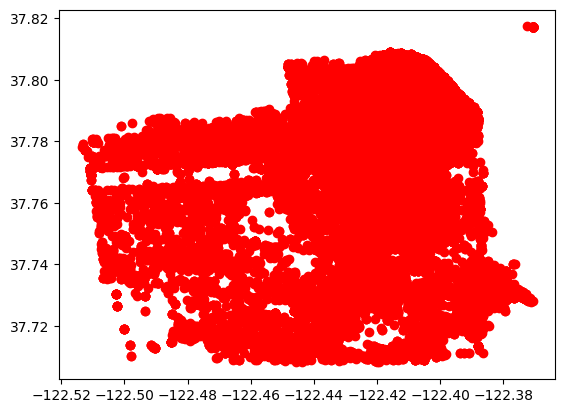

In [27]:
plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()

In [28]:
pd_districts = np.unique(SF['PdDistrict'])

pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [30]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row : pd_districts_levels[row])
SF.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day,PdDistrictCode
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31,1
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31,1
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31,1
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31,4


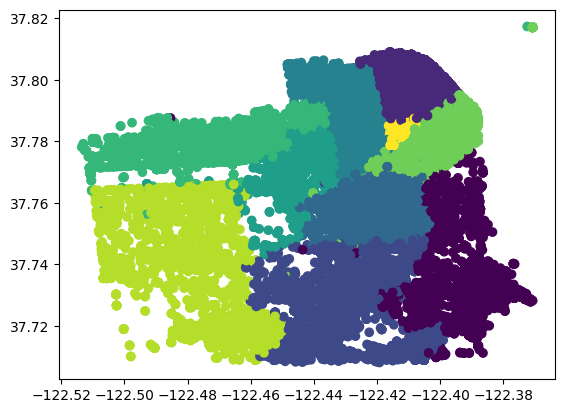

In [31]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()